In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('../datasets/titanic.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


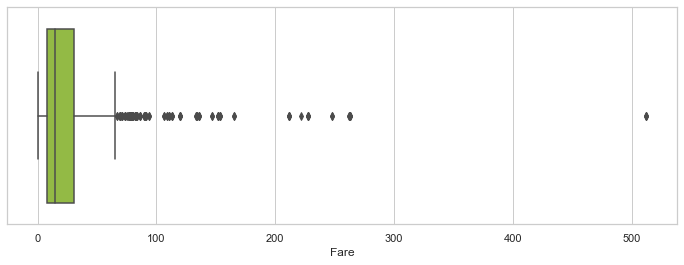

In [4]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.boxplot(x=titanic.Fare, color='yellowgreen');

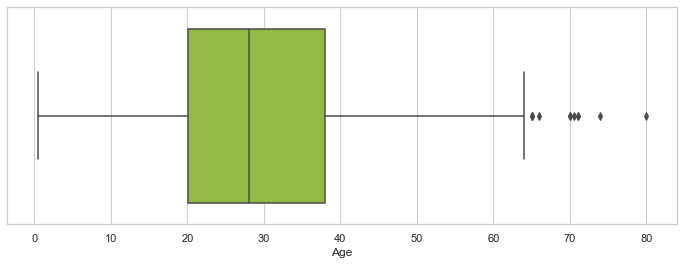

In [4]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=titanic.Age, color='yellowgreen');

In [5]:
def outlier_iqr(data, column): 

    # lower(하한), upper(상한) 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위 수 기준 지정하기     
    q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q3 - q1    
    
    # outlier cutoff(기준점) 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper 구분값 구하기     
    lower, upper = q1 - cut_off, q3 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower 기준값은', lower, '이다.')     
    print('upper 기준값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상값 총 개수 구하기
    return print('총 이상값 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [6]:
outlier_iqr(titanic, 'Fare')

IQR은 23.0896 이다.
lower 기준값은 -26.724 이다.
upper 기준값은 65.6344 이다.
총 이상값 개수는 116 이다.


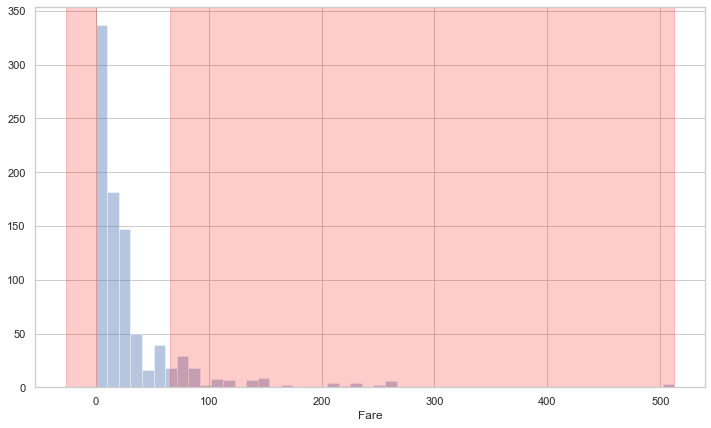

In [31]:
plt.figure(figsize=(12, 7))
sns.distplot(titanic.Fare, bins=50, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=titanic.Fare.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=titanic.Fare.max(), alpha=0.2, color='red')
plt.show();

In [38]:
titanic_no_outlier = titanic[(titanic['Fare'] < upper) & (titanic['Fare'] > lower)]
titanic_no_outlier.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [39]:
len(titanic_no_outlier)

775

In [40]:
outlier = titanic[~(titanic['Fare'] < upper) & (titanic['Fare'] > lower)]
outlier.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [41]:
outlier_index = [outlier.index]
outlier_index

[Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
             ...
             792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
            dtype='int64', length=116)]

In [45]:
titanic.iloc[outlier_index, 9] = titanic['Fare'].mean()

In [47]:
# 이상값 변경 확인
titanic.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458300,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075000,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.133300,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.070800,NaN,C
